# Assignment

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm

# 1. Data

## 1.1 Reading the data

In [3]:

orgnl_df = pd.read_csv(r'https://cdn.upgrad.com/uploads/production/b7624eea-49ad-40e3-8bb6-6f6c0164d14b/day.csv',parse_dates = ['dteday'])
orgnl_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
orgnl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [5]:
orgnl_df.shape

(730, 16)

In [6]:
orgnl_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
orgnl_df.isnull().sum() 

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
orgnl_df[orgnl_df.isnull().sum(axis = 1) > 0]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [9]:
orgnl_df.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

- According to Data Dictionary

|Continuous Variables|Binary Variables|Categorical Variables|
|--|--|--|
|instant|yr|season|
|temp|holiday|mnth|
|atemp|workingday|weekday|
|hum||weathersit|
|windspeed|
|casual|
|registered|
|cnt||

## 1.2 dropping unnecessary variables

In [10]:
orgnl_df.drop(['instant','dteday','casual','registered'],axis = 1,inplace = True)
orgnl_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## 1.3 Replacing values in these columns with the values from data dictionary

|weathersit||season||
|--|--|--|--|
|<b>value(in df)</b> |<b>what it means (acc. to data dictionary)</b> |<b>value(in df)</b> |<b>what it means (acc. to data dictionary)</b> |
|1|Clear, Few clouds, Partly cloudy, Partly cloudy|1|spring|
|2|Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist|2|summer
|3|Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds|3|fall|
|4|Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog|4|winter|

|mnth||||weekday|||||
|--|--|--|--|--|--|--|--|--|
|<b>value(in df)</b> |<b>what it means (acc. to data dictionary)</b> |<b>value(in df)</b> |<b>what it means (acc. to data dictionary)</b> |<b>value(in df)</b> |<b>what it means (acc. to data dictionary)</b> |<b>value(in df)</b> |<b>what it means (acc. to data dictionary)</b> |
|1|Jan|2|Feb|0|Sunday|1|Monday|
|3|Mar|4|Apr|2|Tuesday|3|Wednesday|
|5|May|6|Jun|4|Thursday|5|Friday|
|7|Jul|8|Aug|6|Saturday|||
|9|Sep|10|Oct|||||
|11|Nov|12|Dec|||||

In [11]:

orgnl_df['season'].replace({1:'spring',2:'summer',3:'fall',4:'winter'},inplace = True)
orgnl_df.season = orgnl_df.season.astype('category')


orgnl_df['weathersit'].replace({1:'Clear, Partly Cloudy',2:'Mist+Cloudy',3:'Light snow/rain',4:'Heavy snow/rain'},inplace = True)
orgnl_df.weathersit = orgnl_df.weathersit.astype('category')

orgnl_df['mnth'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'},inplace = True)
orgnl_df.mnth = orgnl_df.mnth.astype('category')

orgnl_df['weekday'].replace({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'},inplace = True)
orgnl_df.weekday = orgnl_df.weekday.astype('category')

orgnl_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist+Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist+Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,"Clear, Partly Cloudy",8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,"Clear, Partly Cloudy",8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,"Clear, Partly Cloudy",9.305237,11.46350,43.6957,12.522300,1600


## 1.4 Data Visualization and EDA

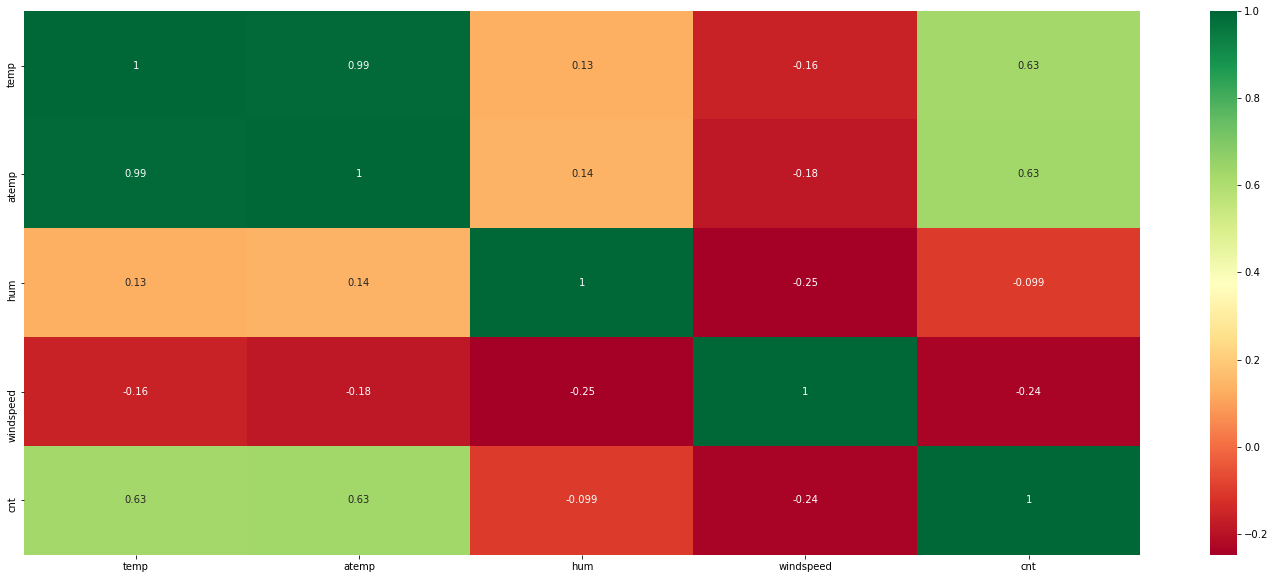

In [12]:
plt.figure(figsize = (25,10))
sns.heatmap(orgnl_df[['temp','atemp','hum','windspeed','cnt']].corr(),annot = True, cmap = 'RdYlGn')
plt.show()

| Var 1 | Var 2 | Correlation |
|--|--|--|
| atemp | temp | 0.99|
|cnt | temp | 0.63 |
|cnt|atemp|0.63|
|hum|atemp|0.14|
|hum|temp|0.13|
|cnt|hum|-0.099|
|windspeed|temp|-0.16|
|windspeed|atemp|-0.18|
|cnt|windspeed|-0.24|
|windspeed|hum|-0.25|

- `temp` and `atemp` variables are highly correlated
- `temp` and `cnt` variables are highly correlated
- `atemp` and `cnt` variables are highly correlated

- `Dropping` `atemp` column because it is highly correlated with temp. so, it becomes redundant while building model

In [13]:
orgnl_df.drop(['atemp'],axis = 1, inplace = True)

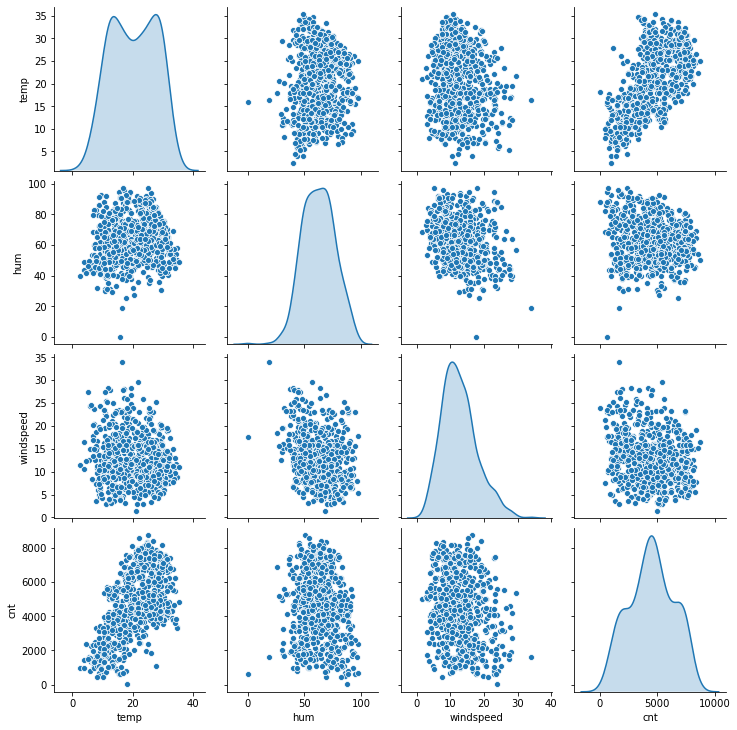

In [14]:

sns.pairplot(orgnl_df[['temp','hum','windspeed','cnt']],diag_kind = 'kde')
plt.show()

- there is some linear relationship between `temp` and `cnt`

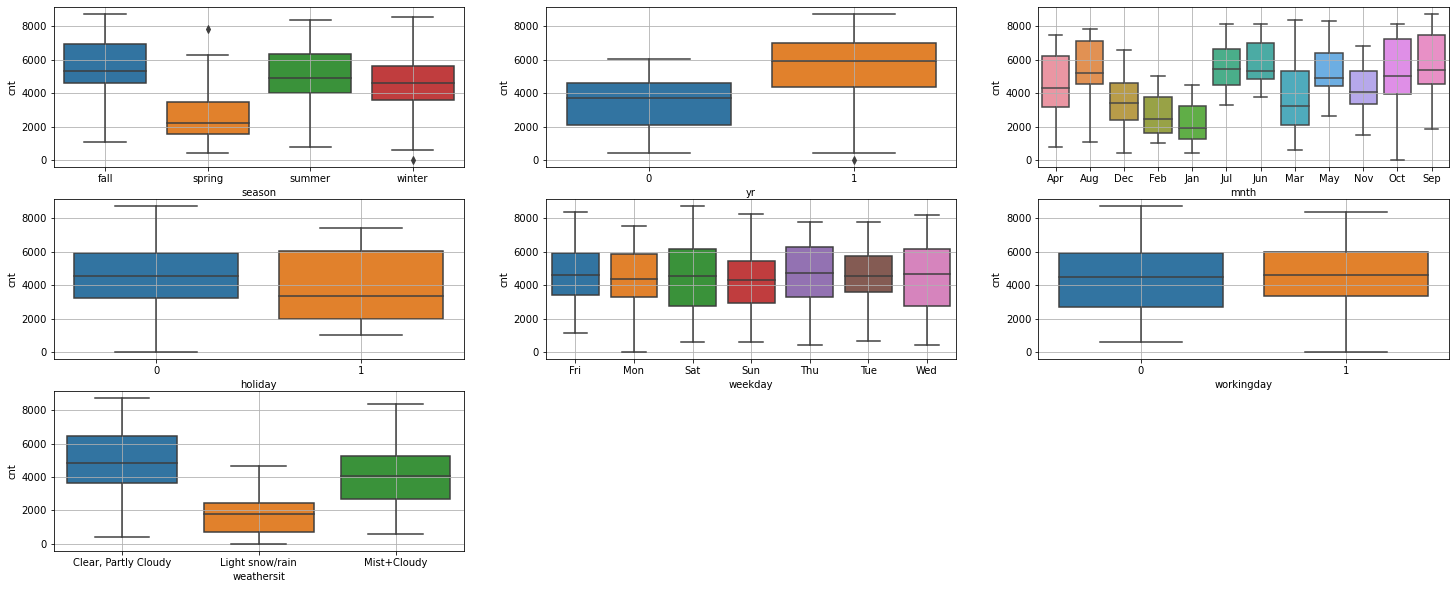

In [15]:


plt.figure(figsize = (25,10))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = orgnl_df)
plt.grid()
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = orgnl_df)
plt.grid()
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = orgnl_df)
plt.grid()
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = orgnl_df)
plt.grid()
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = orgnl_df)
plt.grid()
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = orgnl_df)
plt.grid()
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = orgnl_df)
plt.grid()
plt.show()

- there are less number of `cnt` users where `season = spring` when compared to other seasons
- bike riding got more users in `yr = 1` which indicates the `year 2019`
- There are no `cnt` values where `weathersit = Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog`
    - those conditions are highly unfavourable for bike riding. hence, no cnt values
 

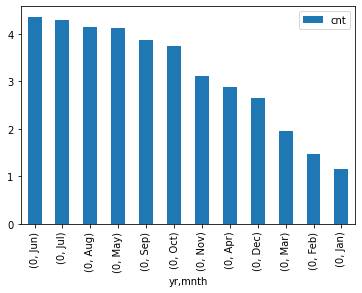

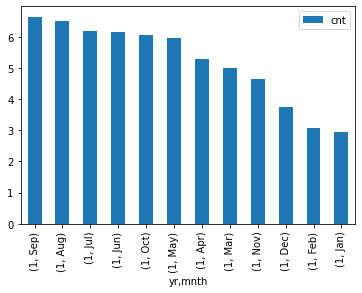

In [16]:
yr_mnth = pd.DataFrame(orgnl_df.groupby(['yr','mnth'])['cnt'].sum()/orgnl_df.cnt.sum()*100)
yr_mnth.dropna(how='any',axis = 0,inplace = True)
#yr_mnth.sort_values(by = 'cnt',ascending = False)
(yr_mnth.iloc[:12,:].sort_values(by = 'cnt',ascending = False)).plot.bar()
(yr_mnth.iloc[12:,:].sort_values(by = 'cnt',ascending = False)).plot.bar()

- Clearly, `cnt` increased in `yr = 1 (2019)` when compared to `yr = 0 (2018)`
- There is a `gradual increase` in `cnt` values from `Jan to Jul` in `yr = 0` and `gradual decrease` from `Jun to Dec` in `yr = 0`
- There is a `gradual increase` in `cnt` values from `Jan to Sep` in `yr = 1` and `gradual decrease` from `Sep to Dec` in `yr = 1`

In [17]:
workingday = pd.DataFrame(orgnl_df.groupby(['workingday'])['cnt'].sum()/orgnl_df.cnt.sum()*100)
workingday.dropna(how='any',axis = 0,inplace = True)
workingday

,cnt
workingday,
0,30.395506
1,69.604494


- Clearly, `workingday = 1` got `more cnt`

In [18]:
yr_season_holiday = pd.DataFrame(orgnl_df.groupby(['yr','season','holiday'])['cnt'].sum()/orgnl_df.cnt.sum()*100)
yr_season_holiday.dropna(how='any',axis = 0,inplace = True)
yr_season_holiday

cnt
yr season holiday           
0  fall   0        12.466585
          1         0.285459
   spring 0         4.454054
          1         0.104046
   summer 0        10.334489
          1         0.219518
   winter 0         9.607168
          1         0.303266
1  fall   0        19.084521
          1         0.408315
   spring 0         9.454198
          1         0.254980
   summer 0        16.982264
          1         0.377198
   winter 0        15.233291
          1         0.430649

- `cnt` values for `season` in both years are in this order
    - `fall > summer > winter > spring`
- clearly, `cnt` values are very less when there is a `holiday` 

# 2. Data Preparation

## 2.1 Create Dummy variables for categorical variables

In [19]:
bike_df = pd.get_dummies(orgnl_df,drop_first = True)
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          730 non-null    int64  
 1   holiday                     730 non-null    int64  
 2   workingday                  730 non-null    int64  
 3   temp                        730 non-null    float64
 4   hum                         730 non-null    float64
 5   windspeed                   730 non-null    float64
 6   cnt                         730 non-null    int64  
 7   season_spring               730 non-null    uint8  
 8   season_summer               730 non-null    uint8  
 9   season_winter               730 non-null    uint8  
 10  mnth_Aug                    730 non-null    uint8  
 11  mnth_Dec                    730 non-null    uint8  
 12  mnth_Feb                    730 non-null    uint8  
 13  mnth_Jan                    730 non

## 2.2 Dividing the dataset into Train and Test set

In [20]:
train_df, test_df = train_test_split(bike_df,train_size = 0.7, test_size = 0.3, random_state = 100)
train_df.shape,test_df.shape

((510, 29), (219, 29))

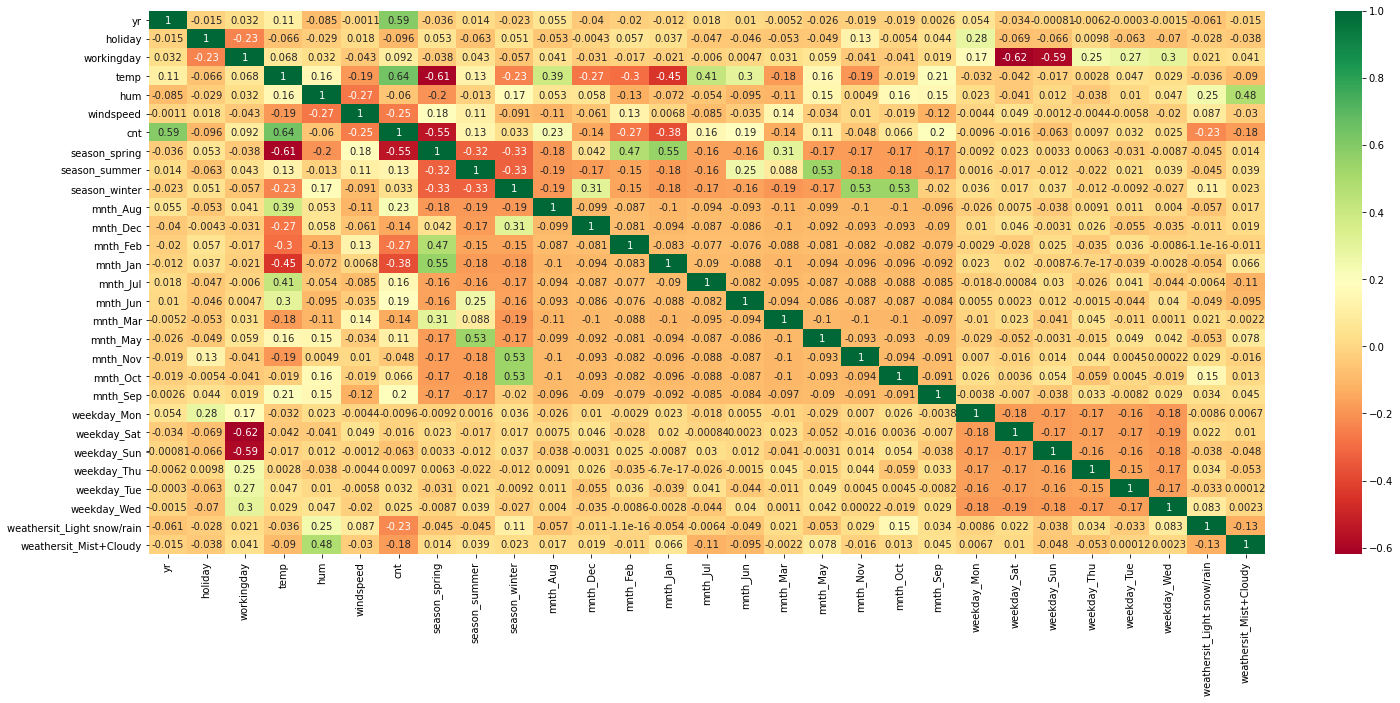

In [21]:
plt.figure(figsize = (25,10))

sns.heatmap(train_df.corr(),annot = True, cmap = 'RdYlGn')
plt.show()

## 2.3 Scaling numerical features 

In [22]:
scaler = MinMaxScaler()

In [23]:
train_df[['temp','hum','windspeed','cnt']] = scaler.fit_transform(train_df[['temp','hum','windspeed','cnt']])

In [24]:
train_df.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light snow/rain,weathersit_Mist+Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 2.4 Dividing Train dataset into X(features/independant) and y(target/dependent) 

In [25]:
y_train = train_df.pop('cnt')
X_train = train_df
X_train.shape,y_train.shape

((510, 28), (510,))

# 3. Data Modelling 

## 3.1 Model 1

In [26]:
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,15)
rfe = rfe.fit(X_train,y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 7),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 5),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 10),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 6),
 ('weekday_Thu', False, 11),
 ('weekday_Tue', False, 9),
 ('weekday_Wed', False, 12),
 ('weathersit_Light snow/rain', True, 1),
 ('weathersit_Mist+Cloudy', True, 1)]

In [27]:
col = X_train.columns[rfe.support_]

X_train = X_train[col]

In [28]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by = 'VIF', ascending = False, inplace = True)

In [29]:
vif

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,season_spring,4.53
8,season_winter,3.48
7,season_summer,2.84
14,weathersit_Mist+Cloudy,2.29
0,yr,2.09
12,weekday_Sat,1.98


In [30]:
X_train_sm1 = sm.add_constant(X_train)

lr1 = sm.OLS(y_train,X_train_sm1).fit()

In [31]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.31e-191
Time:                        23:46:20   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2510      0.036      6.949      0.000       0.180       0.322
yr                             0.2305      0.008     28.807      0.000       0.215       0.246
holiday                       -0.0585      0.027     -2.178      0.030      -0.111      -0.006
workingday                     0.0435      0.012      3.781      0.000       0.021       0.066
temp                           0.5098      0.034     14.851      0.000       0.442       0.577
hum                           -0.1547      0.037     -4.145      0.000      -0.228      -0.081
windspeed                     -0.1860      0.025     -7.301      0.000      -0.236      -0.136
season_spring                 -0.0508      0.021     -2.461      0.014      -0.091      -0.010
season_summer                  0.0497      0.015      3.346      0.001       0.020       0.079
season_winter                  0.0944      0.017      5.479      0.000       0.061       0.128
mnth_Jan                      -0.0343      0.017     -1.980      0.048      -0.068      -0.000
mnth_Jul                      -0.0532      0.018     -2.947      0.003      -0.089      -0.018
mnth_Sep                       0.0812      0.016      4.934      0.000       0.049       0.114
weekday_Sat                    0.0537      0.014      3.707      0.000       0.025       0.082
weathersit_Light snow/rain    -0.2488      0.026     -9.560      0.000      -0.300      -0.198
weathersit_Mist+Cloudy        -0.0578      0.010     -5.574      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       66.344   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.565
Skew:                          -0.676   Prob(JB):                     8.25e-36
Kurtosis:                       5.403   Cond. No.                         22.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3.2 Model 2

In [32]:
X_train_sm2 = sm.add_constant(X_train_sm1.drop('mnth_Jan',axis = 1))

lr2 = sm.OLS(y_train,X_train_sm2).fit()

lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.13e-191
Time:                        23:46:21   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2394      0.036      6.696      0.000       0.169       0.310
yr                             0.2297      0.008     28.660      0.000       0.214       0.245
holiday                       -0.0594      0.027     -2.206      0.028      -0.112      -0.006
workingday                     0.0432      0.012      3.744      0.000       0.021       0.066
temp                           0.5278      0.033     15.897      0.000       0.463       0.593
hum                           -0.1595      0.037     -4.268      0.000      -0.233      -0.086
windspeed                     -0.1806      0.025     -7.110      0.000      -0.231      -0.131
season_spring                 -0.0554      0.021     -2.694      0.007      -0.096      -0.015
season_summer                  0.0526      0.015      3.553      0.000       0.024       0.082
season_winter                  0.1003      0.017      5.890      0.000       0.067       0.134
mnth_Jul                      -0.0549      0.018     -3.035      0.003      -0.090      -0.019
mnth_Sep                       0.0818      0.016      4.956      0.000       0.049       0.114
weekday_Sat                    0.0532      0.015      3.661      0.000       0.025       0.082
weathersit_Light snow/rain    -0.2463      0.026     -9.449      0.000      -0.298      -0.195
weathersit_Mist+Cloudy        -0.0578      0.010     -5.559      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       64.879   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.454
Skew:                          -0.661   Prob(JB):                     3.91e-35
Kurtosis:                       5.390   Cond. No.                         21.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm2.values,i) for i in range(X_train_sm2.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by = 'VIF', ascending = False, inplace = True)
vif

,Features,VIF
0,const,82.34
7,season_spring,5.02
4,temp,3.62
9,season_winter,3.49
8,season_summer,2.61
5,hum,1.91
3,workingday,1.88
12,weekday_Sat,1.78
14,weathersit_Mist+Cloudy,1.57
10,mnth_Jul,1.49


## 3.3 Model 3

In [34]:
X_train_sm3 = sm.add_constant(X_train_sm2.drop('season_spring',axis = 1))

lr3 = sm.OLS(y_train,X_train_sm3).fit()

lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.2
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.77e-191
Time:                        23:46:21   Log-Likelihood:                 514.15
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     496   BIC:                            -941.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1815      0.029      6.311      0.000       0.125       0.238
yr                             0.2284      0.008     28.368      0.000       0.213       0.244
holiday                       -0.0611      0.027     -2.256      0.025      -0.114      -0.008
workingday                     0.0436      0.012      3.750      0.000       0.021       0.066
temp                           0.5945      0.022     26.713      0.000       0.551       0.638
hum                           -0.1708      0.037     -4.571      0.000      -0.244      -0.097
windspeed                     -0.1877      0.025     -7.386      0.000      -0.238      -0.138
season_summer                  0.0806      0.011      7.590      0.000       0.060       0.101
season_winter                  0.1368      0.010     13.145      0.000       0.116       0.157
mnth_Jul                      -0.0456      0.018     -2.552      0.011      -0.081      -0.010
mnth_Sep                       0.0945      0.016      5.938      0.000       0.063       0.126
weekday_Sat                    0.0535      0.015      3.655      0.000       0.025       0.082
weathersit_Light snow/rain    -0.2414      0.026     -9.224      0.000      -0.293      -0.190
weathersit_Mist+Cloudy        -0.0554      0.010     -5.314      0.000      -0.076      -0.035
==============================================================================
Omnibus:                       59.216   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.277
Skew:                          -0.645   Prob(JB):                     1.40e-28
Kurtosis:                       5.092   Cond. No.                         20.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm3.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm3.values,i) for i in range(X_train_sm3.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by = 'VIF', ascending = False)

,Features,VIF
0,const,52.63
5,hum,1.89
3,workingday,1.88
11,weekday_Sat,1.78
4,temp,1.60
13,weathersit_Mist+Cloudy,1.56
9,mnth_Jul,1.43
7,season_summer,1.33
8,season_winter,1.29
12,weathersit_Light snow/rain,1.24


## 3.4 Model 4

In [36]:
X_train_sm4 = sm.add_constant(X_train_sm3.drop('holiday',axis = 1))

lr4 = sm.OLS(y_train,X_train_sm4).fit()

lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     223.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.26e-191
Time:                        23:46:21   Log-Likelihood:                 511.55
No. Observations:                 510   AIC:                            -997.1
Df Residuals:                     497   BIC:                            -942.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1705      0.028      5.991      0.000       0.115       0.226
yr                             0.2286      0.008     28.280      0.000       0.213       0.244
workingday                     0.0527      0.011      4.816      0.000       0.031       0.074
temp                           0.5960      0.022     26.678      0.000       0.552       0.640
hum                           -0.1693      0.038     -4.514      0.000      -0.243      -0.096
windspeed                     -0.1885      0.026     -7.386      0.000      -0.239      -0.138
season_summer                  0.0815      0.011      7.650      0.000       0.061       0.102
season_winter                  0.1365      0.010     13.067      0.000       0.116       0.157
mnth_Jul                      -0.0442      0.018     -2.467      0.014      -0.079      -0.009
mnth_Sep                       0.0926      0.016      5.804      0.000       0.061       0.124
weekday_Sat                    0.0627      0.014      4.446      0.000       0.035       0.090
weathersit_Light snow/rain    -0.2404      0.026     -9.152      0.000      -0.292      -0.189
weathersit_Mist+Cloudy        -0.0551      0.010     -5.261      0.000      -0.076      -0.035
==============================================================================
Omnibus:                       65.490   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.563
Skew:                          -0.687   Prob(JB):                     2.02e-33
Kurtosis:                       5.280   Cond. No.                         20.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm4.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm4.values,i) for i in range(X_train_sm4.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by = 'VIF', ascending = False)

,Features,VIF
0,const,51.12
4,hum,1.89
2,workingday,1.65
10,weekday_Sat,1.64
3,temp,1.60
12,weathersit_Mist+Cloudy,1.56
8,mnth_Jul,1.43
6,season_summer,1.33
7,season_winter,1.29
11,weathersit_Light snow/rain,1.24


## 3.5 Model 5

In [38]:
X_train_sm5 = sm.add_constant(X_train_sm4.drop('mnth_Jul',axis = 1))

lm5 = sm.OLS(y_train,X_train_sm5).fit()

lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.89e-191
Time:                        23:46:22   Log-Likelihood:                 508.45
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     498   BIC:                            -942.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1698      0.029      5.937      0.000       0.114       0.226
yr                             0.2294      0.008     28.272      0.000       0.213       0.245
workingday                     0.0536      0.011      4.875      0.000       0.032       0.075
temp                           0.5709      0.020     28.559      0.000       0.532       0.610
hum                           -0.1613      0.038     -4.295      0.000      -0.235      -0.087
windspeed                     -0.1861      0.026     -7.259      0.000      -0.236      -0.136
season_summer                  0.0899      0.010      8.859      0.000       0.070       0.110
season_winter                  0.1407      0.010     13.575      0.000       0.120       0.161
mnth_Sep                       0.1025      0.016      6.610      0.000       0.072       0.133
weekday_Sat                    0.0630      0.014      4.450      0.000       0.035       0.091
weathersit_Light snow/rain    -0.2439      0.026     -9.250      0.000      -0.296      -0.192
weathersit_Mist+Cloudy        -0.0553      0.011     -5.255      0.000      -0.076      -0.035
==============================================================================
Omnibus:                       72.653   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.950
Skew:                          -0.754   Prob(JB):                     3.39e-37
Kurtosis:                       5.372   Cond. No.                         20.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm5.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm5.values,i) for i in range(X_train_sm5.shape[1])]
vif['VIF'] = round(vif.VIF,2)
vif.sort_values(by = 'VIF', ascending = False)

,Features,VIF
0,const,51.12
4,hum,1.87
2,workingday,1.65
9,weekday_Sat,1.64
11,weathersit_Mist+Cloudy,1.56
3,temp,1.27
7,season_winter,1.25
10,weathersit_Light snow/rain,1.24
6,season_summer,1.19
5,windspeed,1.18


## 3.6 Model 6 (Final Model)

In [40]:
X_train_sm6 = sm.add_constant(X_train_sm5.drop('hum',axis = 1))

lm6 = sm.OLS(y_train,X_train_sm6).fit()

lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.47e-188
Time:                        23:46:22   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0753      0.019      4.051      0.000       0.039       0.112
yr                             0.2331      0.008     28.382      0.000       0.217       0.249
workingday                     0.0563      0.011      5.048      0.000       0.034       0.078
temp                           0.5499      0.020     27.885      0.000       0.511       0.589
windspeed                     -0.1552      0.025     -6.201      0.000      -0.204      -0.106
season_summer                  0.0874      0.010      8.481      0.000       0.067       0.108
season_winter                  0.1318      0.010     12.760      0.000       0.112       0.152
mnth_Sep                       0.0972      0.016      6.181      0.000       0.066       0.128
weekday_Sat                    0.0677      0.014      4.710      0.000       0.039       0.096
weathersit_Light snow/rain    -0.2880      0.025    -11.659      0.000      -0.337      -0.239
weathersit_Mist+Cloudy        -0.0813      0.009     -9.292      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       68.959   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.793
Skew:                          -0.731   Prob(JB):                     4.02e-34
Kurtosis:                       5.258   Cond. No.                         11.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm6.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm6.values,i) for i in range(X_train_sm6.shape[1])]
vif['VIF'] = round(vif.VIF,2)
vif.sort_values(by = 'VIF', ascending = False)

,Features,VIF
0,const,20.87
2,workingday,1.64
8,weekday_Sat,1.63
3,temp,1.20
6,season_winter,1.20
5,season_summer,1.19
7,mnth_Sep,1.10
4,windspeed,1.09
9,weathersit_Light snow/rain,1.05
10,weathersit_Mist+Cloudy,1.04


- VIF (variance inflation factor) for constant should be ignored.

# 4. Residual Analysis

In [42]:
y_train_pred = lm6.predict(X_train_sm6)

residual = y_train - y_train_pred

## 4.1 Distribution of Residuals ( Should follow a normal distribution and mean should be around 0)

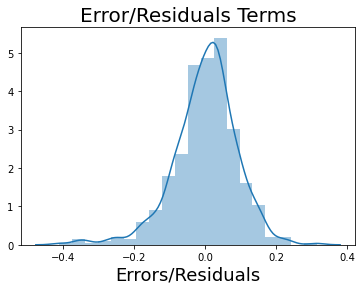

In [43]:
sns.distplot(residual, bins = 20)
plt.title('Error/Residuals Terms',fontsize = 20)
plt.xlabel('Errors/Residuals',fontsize = 18)
plt.show()

- Residual Distribution follows normal distribution as expected and mean is around 0
- So, the model is significant

## 4.2 Error/ Residual terms should have constant variance, Independent(predictors) should  be uncorrelated with the error/residual(No pattern when graphed)

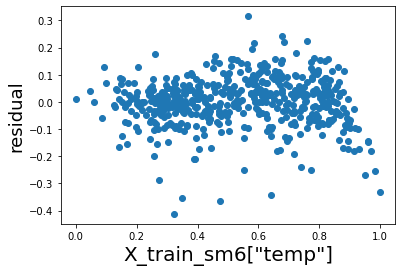

In [44]:
plt.scatter(x = X_train_sm6['temp'],y = residual)
plt.xlabel('X_train_sm6["temp"]',fontsize = 20)
plt.ylabel('residual',fontsize = 18)
plt.show()

- Error terms had constant variance
- There is no pattern visible between the scatterplot of residuals and an independent variable (predictor)
- Hence, the conditions are met

# 5. Predictions and Evaluation on the test set

In [45]:
num_vars = ['temp', 'hum', 'windspeed','cnt']

test_df[num_vars] = scaler.transform(test_df[num_vars])

In [46]:
test_df.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light snow/rain,weathersit_Mist+Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
y_test = test_df.pop('cnt')
X_test = test_df

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          219 non-null    int64  
 1   holiday                     219 non-null    int64  
 2   workingday                  219 non-null    int64  
 3   temp                        219 non-null    float64
 4   hum                         219 non-null    float64
 5   windspeed                   219 non-null    float64
 6   season_spring               219 non-null    uint8  
 7   season_summer               219 non-null    uint8  
 8   season_winter               219 non-null    uint8  
 9   mnth_Aug                    219 non-null    uint8  
 10  mnth_Dec                    219 non-null    uint8  
 11  mnth_Feb                    219 non-null    uint8  
 12  mnth_Jan                    219 non-null    uint8  
 13  mnth_Jul                    219 no

In [48]:
#Selecting the variables that were part of final model.
col1=X_train_sm6.columns

X_test=X_test[col1[1:]]

# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)

X_test_lm6.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   const                       219 non-null    float64
 1   yr                          219 non-null    int64  
 2   workingday                  219 non-null    int64  
 3   temp                        219 non-null    float64
 4   windspeed                   219 non-null    float64
 5   season_summer               219 non-null    uint8  
 6   season_winter               219 non-null    uint8  
 7   mnth_Sep                    219 non-null    uint8  
 8   weekday_Sat                 219 non-null    uint8  
 9   weathersit_Light snow/rain  219 non-null    uint8  
 10  weathersit_Mist+Cloudy      219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.5 KB


In [49]:
y_test_pred = lm6.predict(X_test_lm6)

In [50]:
# r2_score for test dataset
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7955844377237248

In [51]:
# r2_score for training dataset
r2_score(y_train, y_train_pred)

0.8357769866151917

- the difference between r2 scores of training dataset and test dataset should not exceed 5%

In [52]:
r2_score(y_train, y_train_pred) - r2_score(y_test, y_test_pred)

0.04019254889146695

- the difference between train dataset and test dataset is 4%. Hence, the model is able to predict well on unseen data

# 6. Final Model Interpretation

- <b>lm6 model coefficient values</b>

In [53]:
param = pd.DataFrame(lm6.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,11))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
3,temp,0.549936
1,yr,0.233056
6,season_winter,0.131826
7,mnth_Sep,0.097236
5,season_summer,0.087429
0,const,0.075325
8,weekday_Sat,0.067688
2,workingday,0.056323
10,weathersit_Mist+Cloudy,-0.081347


- <b>F Statistics</b>

    - F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

- `F-statistic`: 254.0
- `Prob (F-statistic)`: 1.47e-188
- The `F-Statistics` value of `254` (which is greater than 1) and the `prob(F-Statistic)` value of `'~0.0000'` states that the `overall model is significant`.

## The equation of best fitted surface based on model lm6: 

 `cnt = 0.0753 + (temp * 0.5499) - (weathersit_Light snow/rain * 0.288) + (yr * 0.2331) - (windspeed * 0.1552) + (season_winter * 0.1318) + (mnth_Sep * 0.0972) + (season_summer * 0.0874) - (weathersit_Mist+Cloudy * 0.0813) + (weekday_Sat * 0.0677) + (workingday * 0.0563)`

## <b>Interpretation of Coefficients:</b>

- <b>temp:</b> A coefficient value of ‘0.5499’ indicated that a unit increase in `temp` variable, `increases` the bike hire numbers by `0.5499` units.

- <b>weathersit_Light snow/rain</b>: A coefficient value of ‘-0.288’ indicated that, w.r.t `weathersit_Clear, Partly Cloudy`, a unit increase in `weathersit_Light snow/rain variable`, `decreases` the bike hire numbers by `0.288` units.

- <b>yr</b>: A coefficient value of ‘0.2331’ indicated that a unit increase in `yr` variable, `increases` the bike hire numbers by `0.2331` units.

- <b>windspeed</b>: A coefficient value of ‘-0.1552’ indicated that a unit increase in `windspeed` variable `decreases` the bike hire numbers by `0.1552` units.

- <b>season_winter</b>: A coefficient value of ‘0.1318’ indicated that w.r.t `season_fall`, a unit increase in `season_winter` variable `increases` the bike hire numbers by `0.1318` units.

- <b>mnth_Sep</b>: A coefficient value of ‘0.0972’ indicated that w.r.t `mnth_Apr`, a unit increase in `mnth_Sep` variable `increases` the bike hire numbers by `0.0972` units.

- <b>season_summer</b>: A coefficient value of ‘0.0874’ indicated that w.r.t `season_fall`, a unit increase in season_summer variable `increases` the bike hire numbers by `0.0874` units.

- <b>weathersit_Mist+Cloudy</b>: A coefficient value of ‘-0.0813’ indicated that w.r.t `weathersit_Clear, Partly Cloudy`, a unit increase in `weathersit_Mist+Cloudy` variable `decreases` the bike hire numbers by `0.0813` units.

- <b>weekday_Sat</b>: A coefficient value of ‘0.0677’ indicated that w.r.t weekday_Fri, a unit increase in `weekday_Sat` variable `increases` the bike hire numbers by `0.0677` units.

- <b>workingday</b>: A coefficient value of ‘0.0563’ indicated that a unit increase in `workingday` variable, `increases` the bike hire numbers by `0.0563` units.

- <b>const</b>: The Constant value of ‘0.0753’ indicated that, in the `absence` of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by `0.0753` units.